In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_colwidth',-1)



### a) Importing and Cleaning Data

In [2]:
df=pd.read_csv('en.openfoodfacts.org.products.csv', delimiter = '\t', converters={'last_modified_t': lambda dt: pd.to_datetime(dt, format='%d%m%Y', errors='coerce')})

C:\Users\tolzosz1\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0,24,25,26,28,44,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(1095347, 178)

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,NaT,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,NaT,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado,kiliweb,1574175736,2019-11-19T15:02:16Z,NaT,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,1444572561,2015-10-11T14:09:21Z,NaT,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,NaT,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095347 entries, 0 to 1095346
Columns: 178 entries, code to carnitine_100g
dtypes: datetime64[ns](1), float64(120), int64(1), object(56)
memory usage: 1.5+ GB


In [6]:
df.isnull().sum()

code                                       0      
url                                        0      
creator                                    4      
created_t                                  0      
created_datetime                           1      
last_modified_t                            1095347
last_modified_datetime                     0      
product_name                               53514  
generic_name                               1000329
quantity                                   755632 
packaging                                  903799 
packaging_tags                             903806 
brands                                     468630 
brands_tags                                468680 
categories                                 687320 
categories_tags                            687324 
categories_en                              687324 
origins                                    1039218
origins_tags                               1039317
manufacturing_places           

#### I define the minimum number of non-null values in order to show a column = 300 000

In [47]:
df2=df.dropna(how= 'all', thresh=300000, axis=1)

In [48]:
df2.shape

(1095347, 48)

In [49]:
df2.isnull().sum()

code                                       0     
url                                        0     
creator                                    4     
created_t                                  0     
created_datetime                           1     
last_modified_datetime                     0     
product_name                               53514 
quantity                                   755632
brands                                     468630
brands_tags                                468680
categories                                 687320
categories_tags                            687324
categories_en                              687324
countries                                  1864  
countries_tags                             1866  
countries_en                               1866  
ingredients_text                           636756
additives_n                                636870
ingredients_from_palm_oil_n                636870
ingredients_that_may_be_from_palm_oil_n    636870


In [50]:
df2.head()

,code,url,creator,created_t,created_datetime,last_modified_datetime,product_name,quantity,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.560000,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado,kiliweb,1574175736,2019-11-19T15:02:16Z,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,1444572561,2015-10-11T14:09:21Z,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,...,8.2,2.20,29.0,22.0,0.0,5.1,4.6,1.811024,18.0,18.0
4,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,2019-06-08T18:56:13Z,Sfiudwx,dgesc,Watt,watt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check for dupicates --> 65have been found und eliminated

In [11]:
df2.duplicated().sum()

65

In [12]:
df2.drop_duplicates(keep='last', inplace=True)

C:\Users\tolzosz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
df2.duplicated().sum()

0

In [14]:
df2.head()


,code,url,creator,created_t,created_datetime,last_modified_datetime,product_name,quantity,brands,brands_tags,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,NaN,...,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.560000,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado,kiliweb,1574175736,2019-11-19T15:02:16Z,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,1444572561,2015-10-11T14:09:21Z,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,courte-paille,...,8.2,2.20,29.0,22.0,0.0,5.1,4.6,1.811024,18.0,18.0
4,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,2019-06-08T18:56:13Z,Sfiudwx,dgesc,Watt,watt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df2.insert(1, "created_ts", pd.to_datetime(df2['created_datetime']).apply(lambda x: x.tz_convert('Europe/Berlin').tz_localize(None)), True) 
df2.insert(2, "last_modified_ts", pd.to_datetime(df2['last_modified_datetime']).apply(lambda x: x.tz_convert('Europe/Berlin').tz_localize(None)), True)
df2

,code,created_ts,last_modified_ts,url,creator,created_t,created_datetime,last_modified_datetime,product_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,2018-06-15 12:38:00,2019-06-25 13:55:18,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,1529059080,2018-06-15T10:38:00Z,2019-06-25T11:55:18Z,Vitória crackers,NaN,...,7.0,3.08,70.1,15.0,NaN,7.8,1.400,0.560000,NaN,NaN
1,0000000000031,2018-10-13 23:06:14,2018-10-13 23:06:57,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,1539464774,2018-10-13T21:06:14Z,2018-10-13T21:06:57Z,Cacao,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,2019-11-19 16:02:16,2019-11-19 16:02:17,http://world-en.openfoodfacts.org/product/000000000003327986/filetes-de-pollo-empanado,kiliweb,1574175736,2019-11-19T15:02:16Z,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,2015-10-11 16:09:21,2015-10-12 16:13:32,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,1444572561,2015-10-11T14:09:21Z,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,...,8.2,2.20,29.0,22.0,0.0,5.1,4.600,1.811024,18.0,18.0
4,00000000001111111111,2019-06-08 20:56:13,2019-06-08 20:56:13,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,2019-06-08T18:56:13Z,Sfiudwx,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,2018-08-31 19:53:02,2018-08-31 19:53:06,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,1535737982,2018-08-31T17:53:02Z,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,...,0.0,0.00,4.8,0.4,NaN,0.2,2.040,0.816000,NaN,NaN
6,0000000000178,2018-11-17 13:05:32,2018-11-17 13:05:33,http://world-en.openfoodfacts.org/product/0000000000178/mini-coco,kiliweb,1542456332,2018-11-17T12:05:32Z,2018-11-17T12:05:33Z,Mini coco,NaN,...,3.0,1.00,10.0,3.0,NaN,2.0,1.150,0.460000,NaN,NaN
7,0000000000208,2018-12-07 19:34:40,2018-12-07 19:34:43,http://world-en.openfoodfacts.org/product/0000000000208/pistou-d-ail-des-ours,kiliweb,1544207680,2018-12-07T18:34:40Z,2018-12-07T18:34:43Z,Pistou d'ail des ours,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000000284,2019-01-10 12:37:25,2019-07-19 17:44:12,http://world-en.openfoodfacts.org/product/0000000000284/pain-mais,kiliweb,1547120245,2019-01-10T11:37:25Z,2019-07-19T15:44:12Z,Pain maïs,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000000291,2018-08-14 11:41:09,2018-08-14 11:42:12,http://world-en.openfoodfacts.org/product/0000000000291/mendiants,kiliweb,1534239669,2018-08-14T09:41:09Z,2018-08-14T09:42:12Z,Mendiants,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### B) 3 questions:
        


## 1) What are the top 10 products that are the most unhealthy: highest sum of fat and sugar?


In [16]:
Elements_pro_prod = {'Product Name': df2['product_name'], 'Sum_Elements': df2['fat_100g'] + df2['sugars_100g'] }
df3 = pd.DataFrame(data=Elements_pro_prod)
df3.dropna(how='any', axis = 0, inplace = True)
df3.sort_values(by='Sum_Elements', inplace = True, ascending = False)
df10 = df3.head(10)
df10

,Product Name,Sum_Elements
323890,Real dairy cream,35100.0
1042041,"mlieko 3,5%",8300.0
788584,fairtrade raisins,7580.0
841277,Trip Vadelma,7500.0
940939,Nata especial cuina ATO,3720.0
296834,Greenfields Rosbief Peper,3500.0
94474,My/mo mochi ice cream,3300.0
171194,Hershey’s with almonds,3300.0
95806,Acai Bowl,3000.0
191728,Flap jack chocolate peanut butter,3000.0


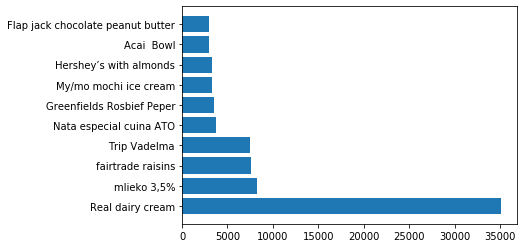

In [17]:
plt.barh(df10['Product Name'], df10['Sum_Elements']);


## 2) what are the top 10 healthiest products: which products have the highest amount of fiber and proteins?

In [18]:
Products_fiber_protein = {'Product name': df2['product_name'], 'Sum_Fiber_Proteins': df2['fiber_100g'] + df2['proteins_100g']}
df4 = pd.DataFrame(data=Products_fiber_protein)
df4.dropna(how='any', axis = 0, inplace = True)
df4.sort_values(by='Sum_Fiber_Proteins', inplace = True, ascending = False)
df11 = df4.head(10)
df11

,Product name,Sum_Fiber_Proteins
139074,oak smoked outdoor bred British bacon lardons,31600.0
296834,Greenfields Rosbief Peper,22000.0
87458,sidekicks beurre et fines herbes,4000.0
70652,Vegan lean shake,3400.0
1042041,"mlieko 3,5%",3300.0
940939,Nata especial cuina ATO,3100.0
139320,Muscle Milk,2900.0
181723,Caramel Cookie Crunch Protein,2600.0
226012,Totally Egg Protein Powder,2500.0
196621,Chicken and potatoes,2300.0


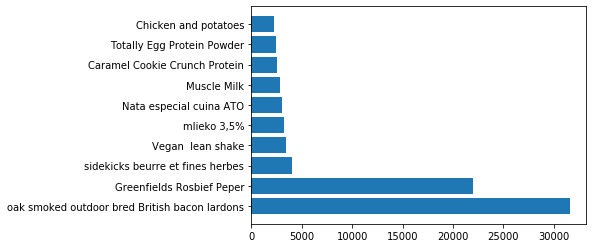

In [19]:
plt.barh(df11['Product name'], df11['Sum_Fiber_Proteins']);

## 3) What top 10 products have the highest ratio between fiber & protein vs fat & sugar?

In [20]:
Final_Ratio = {'Product name': df2['product_name'], 'Fiber&Protein': (df2['fiber_100g'] + df2['proteins_100g']), 'Fat&Sugar': (df2['fat_100g'] + df2['sugars_100g']), 'F&P/F&S': (df2['fiber_100g'] + df2['proteins_100g'])/(df2['fat_100g'] + df2['sugars_100g']) }
df5 = pd.DataFrame(data=Final_Ratio)
df6 = df5[df5['Fat&Sugar'] > 0]
df6.dropna(how='any', axis = 0, inplace = True)
df6.sort_values(by='F&P/F&S', inplace = True, ascending = False)
df12 = df6.head(10)
df12

C:\Users\tolzosz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\tolzosz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Product name,Fiber&Protein,Fat&Sugar,F&P/F&S
894251,Quaker Havermout,44.000035,0.000037,1.189190e+06
843216,Monosodium Glutamate,45.701000,0.002000,2.285050e+04
381865,Moulin Ail,100.000000,0.010000,1.000000e+04
448841,Psyllium blond,81.100000,0.015000,5.406667e+03
839475,Naranj Juice,0.667000,0.000133,5.015038e+03
582328,Levure boulangere speciale pains,38.300000,0.010000,3.830000e+03
907246,Kimbo Caffè Classico 250G,58.000000,0.040000,1.450000e+03
640300,Champignons De Paris Eminces,2.900000,0.002000,1.450000e+03
462360,Quinoa,24.000000,0.020000,1.200000e+03
966474,Vinagre Balsamico de Modena,17.060000,0.020000,8.530000e+02


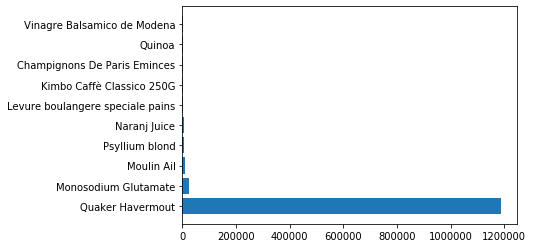

In [46]:
plt.barh(df12['Product name'], df12['F&P/F&S']);


### C) Text data

In [24]:
#creating a new column 'cleaned' for the cleaned ingredients and already doing a translation of basic words as 'salt', 'sugar', 'water' and getting rid of special signs

from collections import Counter 
df14 = pd.DataFrame()
df15 = pd.DataFrame()
df16 = pd.DataFrame()
df14['cleaned'] = df2['ingredients_text'].str.lower().str.replace('sel','salt').str.replace('sucre','sugar').str.replace('eau','water').str.replace(':','').str.replace('_','').str.replace('?','').str.replace('%','').str.replace('.','').str.replace('-','').str.replace('(','').str.replace(')','').str.replace('[0-9]','')
df15['cleaned'] = df14['cleaned'].str.split('\s?,\s?')
df16['cleaned'] = df15['cleaned'].dropna(how='any', axis = 0, inplace = True)
df16['cleaned'] = df15['cleaned'].astype('object')
df16['cleaned'] = df16['cleaned'].astype('object').apply(lambda x: list(dict.fromkeys(x)))
df16['cleaned']



list_of_ingriedients = []

for i in df16['cleaned']:
      list_of_ingriedients.extend(i)

top5 = Counter(list_of_ingriedients).most_common(5)
top5


[('salt', 154506),
 ('sugar', 127400),
 ('water', 113162),
 ('', 56047),
 ('citric acid', 30456)]

### d) Time-series analysis

#Created_datetime and last_modified_datetime is not in the same timezone throughout the overall data, that is why I have converted them in df2. 

In [25]:
lm_list = df2['last_modified_ts'].head(70000)
cre_list = df2['created_ts'].head(70000)
dif_list = []

for i in range(len(lm_list)):
    x= ((lm_list[i])-(cre_list[i])).total_seconds()
    if x is None:
        dif_list.append('0')
    elif x < 0:
        dif_list.append('0')
    else:
        dif_list.append(x)
Mean_Diff_s = np.mean(dif_list)
Mean_Diff_h = Mean_Diff_s/3600
print(Mean_Diff_h)


4846.390865194445


In [26]:
#Number of items created each month

C:\Users\tolzosz1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


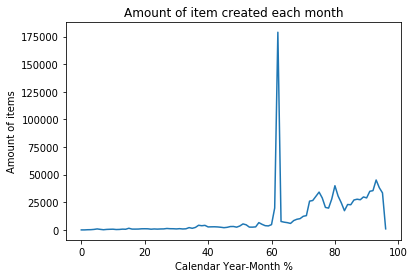

In [27]:
import matplotlib.pyplot as plt

df2['Created_YearMonth'] = pd.DatetimeIndex(df2['created_ts']).to_period('M')
new_group = df2.groupby('Created_YearMonth')
new_group = new_group.count().reset_index()#.head(100)
#new_group

plt.plot(new_group.index, new_group['code'])
plt.title('Amount of item created each month')
plt.ylabel('Amount of items')
plt.xlabel('Calendar Year-Month %')
plt.show()

### d) Build a database

In [28]:
import sqlite3
db = sqlite3.connect('database.sqlite')
cursor = db.cursor()

In [52]:
cursor.execute("drop table Products")
cursor.execute("CREATE TABLE Products (Product_Id Integer PRIMARY KEY AUTOINCREMENT, Product_Name TEXT, Product_Type TEXT, Available_Amount INTEGER, Price INTEGER);")

In [53]:
pd.read_sql_query('SELECT * FROM Products;', db)

,Product_Id,Product_Name,Product_Type,Available_Amount,Price


In [54]:
#### Filling up the DB
for i in range(0,1000):
    cursor.execute("INSERT into Products (Product_Name, Product_Type, Available_Amount, Price) values ('Prod_name_1','Prod_Type_1','200','10');")
pd.read_sql_query('SELECT * FROM Products;', db)

,Product_Id,Product_Name,Product_Type,Available_Amount,Price
0,1,Prod_name_1,Prod_Type_1,200,10
1,2,Prod_name_1,Prod_Type_1,200,10
2,3,Prod_name_1,Prod_Type_1,200,10
3,4,Prod_name_1,Prod_Type_1,200,10
4,5,Prod_name_1,Prod_Type_1,200,10
5,6,Prod_name_1,Prod_Type_1,200,10
6,7,Prod_name_1,Prod_Type_1,200,10
7,8,Prod_name_1,Prod_Type_1,200,10
8,9,Prod_name_1,Prod_Type_1,200,10
9,10,Prod_name_1,Prod_Type_1,200,10


In [55]:
cursor.execute("Select Product_Id,Product_Name, Available_Amount from Products where Product_Id = 1000;")
results = cursor.fetchall()
print(results)

[(1000, 'Prod_name_1', 200)]


### e) Finding the best/worst correlation factor



In [56]:
#df2.head(5)

#Max Correlation (=1) --> the best correlation is between glycemic_idex_100g and cerotic_acid_100g. Correlation of 1 means that these 3 factors are proportional
df20 = df[df.columns[1:]].corr()['nutriscore_score'][:-1]==1
df21 = df20[df20 == True]
df21

nutriscore_score       True
-cerotic-acid_100g     True
glycemic-index_100g    True
Name: nutriscore_score, dtype: bool

In [57]:
#Min correlation (-1)--> correlation of -1 means, that palmitic_acid_100g is inversely proportional to nutriscore_score 
df22 = df[df.columns[1:]].corr()['nutriscore_score'][:-1]==-1
df23 = df22[df22 == True]
df23

-palmitic-acid_100g    True
Name: nutriscore_score, dtype: bool